In [90]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [2]:
import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels):
    plt_colors = list(colors.cnames.keys())
    plt_K = np.unique(plt_labels).size

    for k in range(plt_K):
        color = plt_colors[k+10]
        mask = (plt_labels == k)
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')

    plt.show()

In [192]:
def calc_dists(A,B):
    return np.sqrt((np.square(A[:,np.newaxis]-B).sum(axis=2)))

# Zadanie 0

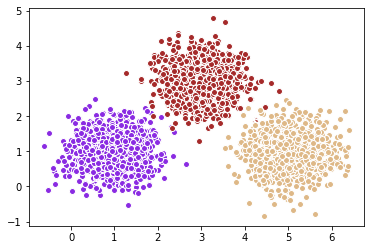

In [33]:
centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

plotClustering(X, labels)

### a) n_init

In practice, the k-means algorithm is very fast (one of the fastest clustering algorithms available), **but it falls in local minima**. That’s why it can be useful to restart it several times.

**N_init** is the number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

In [15]:
#f = open("/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista4/a3.txt", "r")
#f_csv = open("/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista4/a3.csv", "w")
#print(f.read().replace("   ", ",").replace("\n,", "\n").replace(",53920,42968", "53920,42968").replace(" ", ""))

#f_csv.write(f.read().replace("   ", ",").replace("\n,", "\n").replace(" ", ""))

In [21]:
df=pd.read_csv('/home/michal/Dokumenty/Studia/UWr/7/Eksploracja_Danych/lista4/a3.csv', sep=',',header=None)
a3 = df.values

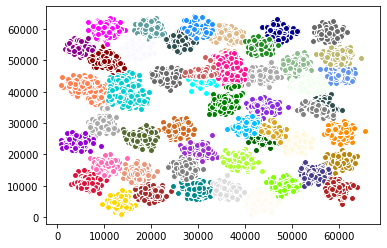

In [31]:
k_means = KMeans(init='k-means++', n_clusters=50, n_init=1)
k_means.fit(a3)
plotClustering(a3, k_means.labels_)

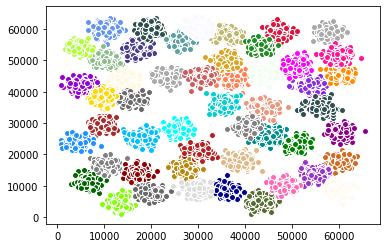

In [23]:
k_means = KMeans(init='k-means++', n_clusters=50, n_init=50)
k_means.fit(a3)
plotClustering(a3, k_means.labels_)

### b) BIRCH, threshold


**Threshold** - the radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.

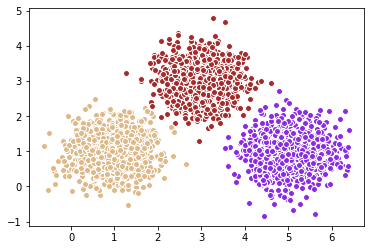

(0.015440653635571651, 0.4339759441155902)

In [266]:
birch = Birch(threshold=1, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_)
my_davies_bouldin_score(X, birch.labels_), davies_bouldin_score(X, birch.labels_)

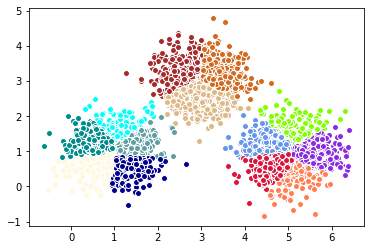

(0.07914835932828053, 0.9874085280970755)

In [267]:
birch = Birch(threshold=.5, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_)
my_davies_bouldin_score(X, birch.labels_), davies_bouldin_score(X, birch.labels_)

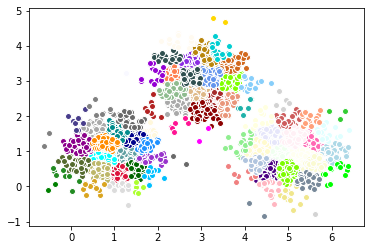

(0.21231160874878915, 0.8205568821322738)

In [268]:
birch = Birch(threshold=0.275, n_clusters=None)
birch.fit(X)
plotClustering(X, birch.labels_)
my_davies_bouldin_score(X, birch.labels_), davies_bouldin_score(X, birch.labels_)

### c) DBScan, eps

**eps** - the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. 

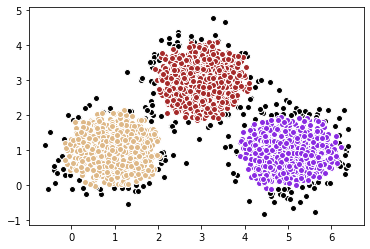

In [82]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

plt.scatter(X[dbscan.labels_ == -1,0],X[dbscan.labels_ == -1,1], color = 'black', marker='o', edgecolors='w')
plotClustering(X, dbscan.labels_)

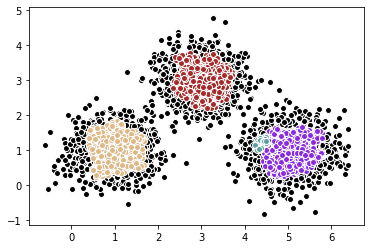

In [83]:
dbscan = DBSCAN(eps=0.15, min_samples=25)
dbscan.fit(X)

plt.scatter(X[dbscan.labels_ == -1,0],X[dbscan.labels_ == -1,1], color = 'black', marker='o', edgecolors='w')
plotClustering(X, dbscan.labels_)

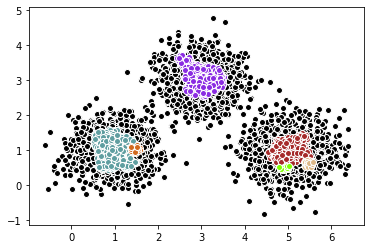

In [88]:
dbscan = DBSCAN(eps=0.125, min_samples=25)
dbscan.fit(X)

plt.scatter(X[dbscan.labels_ == -1,0],X[dbscan.labels_ == -1,1], color = 'black', marker='o', edgecolors='w')
plotClustering(X, dbscan.labels_)

In [265]:
#def my_davies_bouldin_score(X, labels):
 
labels = birch.labels_

def my_davies_bouldin_score(X, labels):
    n_clusters = np.shape(np.unique(labels))[0]

    dim = np.shape(X)[1]
    S = np.zeros(n_clusters)

    centroids = np.array([])

    for i in range(n_clusters):
        cluster_points = X[labels == i]
        centroid = np.array(np.mean(cluster_points, axis=0))
        centroids = np.concatenate((centroids, centroid))
        S[i] = np.sqrt(np.sum(np.square(cluster_points - centroid))) / np.shape(cluster_points)[0] 

    A = centroids.reshape(n_clusters, dim)   
    M = calc_dists(A,A)

    np.fill_diagonal(M,-1)

    R = (S+(S+M.T).T - M) / M

    D = np.max(R, axis = 0)

    return np.sum(D) / n_clusters

my_davies_bouldin_score(X, birch.labels_), davies_bouldin_score(X, birch.labels_)


(0.015440653635571651, 0.4339759441155902)

In [95]:
silhouette_score(X, dbscan.labels_)

-0.23469926528122914